In [3]:
import pandas as pd
import numpy as np
import os
import os as path
import json
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from src.DataExtractor import DataExtractor
sns.set()

In [5]:
#Get all games for every season (takes a few minutes to fetch all the game)
data_extractor = DataExtractor()
df_season_2017 = data_extractor.get_season_into_dataframe('../notebooks/hockey/Season20172018/season20172018.json')
df_season_2018 = data_extractor.get_season_into_dataframe('./../ift6758/data/hockey/test/Season20182019/season20182019.json')
df_season_2019 = data_extractor.get_season_into_dataframe('./../ift6758/data/hockey/test/Season20192020/season20192020.json')
df_season_2020 = data_extractor.get_season_into_dataframe('./../ift6758/data/hockey/test/Season20202021/season20202021.json')
df_season_2021 = data_extractor.get_season_into_dataframe('./../ift6758/data/hockey/test/Season20212022/season20212022.json')

In [6]:
df_season_2017.head(10)

,about.periodTime,about.eventId,about.eventIdx,team.name,result.eventTypeId,coordinates.x,coordinates.y,players.0.player.fullName,players.1.player.fullName,result.secondaryType,result.strength.code,result.emptyNet,gamePk
0,00:38,54,5,Winnipeg Jets,SHOT,-36.0,-28.0,Josh Morrissey,Frederik Andersen,Wrist Shot,None,None,2017020001
1,00:49,55,7,Winnipeg Jets,SHOT,-75.0,1.0,Shawn Matthias,Frederik Andersen,Wrist Shot,None,None,2017020001
2,01:03,58,11,Winnipeg Jets,SHOT,-73.0,10.0,Bryan Little,Frederik Andersen,Backhand,None,None,2017020001
3,01:46,62,16,Toronto Maple Leafs,SHOT,80.0,-3.0,Eric Fehr,Steve Mason,Wrist Shot,None,None,2017020001
4,03:42,68,24,Winnipeg Jets,SHOT,-44.0,-21.0,Patrik Laine,Frederik Andersen,Snap Shot,None,None,2017020001
5,03:50,69,25,Winnipeg Jets,SHOT,-38.0,-5.0,Dustin Byfuglien,Frederik Andersen,Slap Shot,None,None,2017020001
6,04:30,71,27,Winnipeg Jets,SHOT,-47.0,-23.0,Tyler Myers,Frederik Andersen,Slap Shot,None,None,2017020001
7,04:39,73,28,Winnipeg Jets,SHOT,-62.0,21.0,Nikolaj Ehlers,Frederik Andersen,Wrist Shot,None,None,2017020001
8,04:49,74,29,Winnipeg Jets,SHOT,-36.0,-18.0,Jacob Trouba,Frederik Andersen,Wrist Shot,None,None,2017020001
9,05:11,75,31,Toronto Maple Leafs,SHOT,60.0,7.0,Patrick Marleau,Steve Mason,Snap Shot,None,None,2017020001


In [70]:
df_season_2018.head()

,about.periodTime,about.eventId,team.name,result.eventTypeId,coordinates.x,coordinates.y,players.0.player.fullName,players.1.player.fullName,result.secondaryType,result.strength.code,result.emptyNet
0,00:29,10,Montréal Canadiens,SHOT,78.0,-19.0,Artturi Lehkonen,Frederik Andersen,Backhand,None,None
1,00:49,11,Toronto Maple Leafs,SHOT,-37.0,-10.0,Morgan Rielly,Carey Price,Snap Shot,None,None
2,01:00,12,Montréal Canadiens,SHOT,47.0,-23.0,Brendan Gallagher,Frederik Andersen,Wrist Shot,None,None
3,03:54,18,Montréal Canadiens,SHOT,53.0,14.0,Brendan Gallagher,Frederik Andersen,Snap Shot,None,None
4,04:06,20,Montréal Canadiens,SHOT,77.0,-2.0,Mike Reilly,Frederik Andersen,Snap Shot,None,None


In [71]:
df_season_2019.head()

,about.periodTime,about.eventId,team.name,result.eventTypeId,coordinates.x,coordinates.y,players.0.player.fullName,players.1.player.fullName,result.secondaryType,result.strength.code,result.emptyNet
0,00:25,10,Ottawa Senators,GOAL,85.0,-1.0,Brady Tkachuk,Frederik Andersen,Tip-In,EVEN,False
1,01:31,15,Toronto Maple Leafs,SHOT,-32.0,-2.0,Morgan Rielly,Craig Anderson,Snap Shot,None,None
2,03:23,20,Ottawa Senators,SHOT,63.0,-6.0,Dylan DeMelo,Frederik Andersen,Snap Shot,None,None
3,03:56,21,Toronto Maple Leafs,SHOT,-59.0,-20.0,Morgan Rielly,Craig Anderson,Wrist Shot,None,None
4,04:47,24,Toronto Maple Leafs,SHOT,-42.0,-29.0,Tyson Barrie,Craig Anderson,Slap Shot,None,None


In [72]:
df_season_2020.head()

,about.periodTime,about.eventId,team.name,result.eventTypeId,coordinates.x,coordinates.y,players.0.player.fullName,players.1.player.fullName,result.secondaryType,result.strength.code,result.emptyNet
0,00:16,53,Philadelphia Flyers,SHOT,-74.0,29.0,Travis Konecny,Tristan Jarry,Wrist Shot,None,None
1,00:34,9,Pittsburgh Penguins,SHOT,49.0,-25.0,Evan Rodrigues,Carter Hart,Wrist Shot,None,None
2,01:05,55,Philadelphia Flyers,SHOT,-52.0,-31.0,Joel Farabee,Tristan Jarry,Backhand,None,None
3,02:51,62,Pittsburgh Penguins,SHOT,43.0,39.0,Evan Rodrigues,Carter Hart,Snap Shot,None,None
4,03:44,65,Philadelphia Flyers,SHOT,-53.0,8.0,Claude Giroux,Tristan Jarry,Slap Shot,None,None


In [73]:
df_season_2021.head()

,about.periodTime,about.eventId,team.name,result.eventTypeId,coordinates.x,coordinates.y,players.0.player.fullName,players.1.player.fullName,result.secondaryType,result.strength.code,result.emptyNet
0,01:03,54,Tampa Bay Lightning,SHOT,61.0,-32.0,Steven Stamkos,Tristan Jarry,Wrist Shot,None,None
1,01:44,57,Pittsburgh Penguins,SHOT,-65.0,19.0,Brock McGinn,Andrei Vasilevskiy,Wrist Shot,None,None
2,02:01,58,Tampa Bay Lightning,SHOT,-8.0,-27.0,Jan Rutta,Tristan Jarry,Wrist Shot,None,None
3,02:47,60,Pittsburgh Penguins,SHOT,-60.0,-4.0,Danton Heinen,Andrei Vasilevskiy,Wrist Shot,None,None
4,03:07,62,Tampa Bay Lightning,SHOT,63.0,4.0,Ondrej Palat,Tristan Jarry,Wrist Shot,None,None


In [7]:
#Create a copy to avoid modifying the original dataframe (also to avoid running the eralier cell again)
season_2017_df = df_season_2017.copy()
season_2018_df = df_season_2018.copy()
season_2019_df = df_season_2019.copy()
season_2020_df = df_season_2020.copy()
season_2021_df = df_season_2021.copy()

#We drop columns we know we will not use
season_2017_df.drop(['about.periodTime','about.eventId','team.name','coordinates.y','players.0.player.fullName','players.1.player.fullName','result.strength.code','result.emptyNet'], inplace=True, axis=1)
season_2018_df.drop(['about.periodTime','about.eventId','team.name','coordinates.y','players.0.player.fullName','players.1.player.fullName','result.strength.code','result.emptyNet'], inplace=True, axis=1)
season_2019_df.drop(['about.periodTime','about.eventId','team.name','coordinates.y','players.0.player.fullName','players.1.player.fullName','result.strength.code','result.emptyNet'], inplace=True, axis=1)
season_2020_df.drop(['about.periodTime','about.eventId','team.name','coordinates.y','players.0.player.fullName','players.1.player.fullName','result.strength.code','result.emptyNet'], inplace=True, axis=1)
season_2021_df.drop(['about.periodTime','about.eventId','team.name','coordinates.y','players.0.player.fullName','players.1.player.fullName','result.strength.code','result.emptyNet'], inplace=True, axis=1)




In [8]:
#As to make it more readable we change the value of the columns and we group them to get some numbers
season_2017_df.rename(columns={'result.secondaryType':'type_of_shot', 'result.eventTypeId':'type_of_shot_id', 'coordinates.x':'count'}, inplace=True)
season_2017_df_shot_type = season_2017_df.groupby(['type_of_shot', 'type_of_shot_id'])['count'].count().reset_index()

season_2018_df.rename(columns={'result.secondaryType':'type_of_shot', 'result.eventTypeId':'type_of_shot_id', 'coordinates.x':'count'}, inplace=True)
season_2018_df_shot_type = season_2018_df.groupby(['type_of_shot', 'type_of_shot_id'])['count'].count().reset_index()

season_2019_df.rename(columns={'result.secondaryType':'type_of_shot', 'result.eventTypeId':'type_of_shot_id', 'coordinates.x':'count'}, inplace=True)
season_2019_df_shot_type = season_2019_df.groupby(['type_of_shot', 'type_of_shot_id'])['count'].count().reset_index()

season_2020_df.rename(columns={'result.secondaryType':'type_of_shot', 'result.eventTypeId':'type_of_shot_id', 'coordinates.x':'count'}, inplace=True)
season_2020_df_shot_type = season_2020_df.groupby(['type_of_shot', 'type_of_shot_id'])['count'].count().reset_index()

season_2021_df.rename(columns={'result.secondaryType':'type_of_shot', 'result.eventTypeId':'type_of_shot_id', 'coordinates.x':'count'}, inplace=True)
season_2021_df_shot_type = season_2021_df.groupby(['type_of_shot', 'type_of_shot_id'])['count'].count().reset_index()




In [9]:
season_2017_df_shots = season_2017_df_shot_type.groupby('type_of_shot').sum().reset_index()
season_2017_df_goals = season_2017_df_shot_type.query('type_of_shot_id == "GOAL"').reset_index(drop=True)

season_2018_df_shots = season_2018_df_shot_type.groupby('type_of_shot').sum().reset_index()
season_2018_df_goals = season_2018_df_shot_type.query('type_of_shot_id == "GOAL"').reset_index(drop=True)

season_2019_df_shots = season_2019_df_shot_type.groupby('type_of_shot').sum().reset_index()
season_2019_df_goals = season_2019_df_shot_type.query('type_of_shot_id == "GOAL"').reset_index(drop=True)

season_2020_df_shots = season_2020_df_shot_type.groupby('type_of_shot').sum().reset_index()
season_2020_df_goals = season_2020_df_shot_type.query('type_of_shot_id == "GOAL"').reset_index(drop=True)

season_2021_df_shots = season_2021_df_shot_type.groupby('type_of_shot').sum().reset_index()
season_2021_df_goals = season_2021_df_shot_type.query('type_of_shot_id == "GOAL"').reset_index(drop=True)

In [10]:
season_2017_df_shots

,type_of_shot,count
0,Backhand,7077
1,Deflected,1450
2,Slap Shot,14279
3,Snap Shot,12465
4,Tip-In,4449
5,Wrap-around,893
6,Wrist Shot,46513


In [11]:
season_2017_df_goals

,type_of_shot,type_of_shot_id,count
0,Backhand,GOAL,808
1,Deflected,GOAL,262
2,Slap Shot,GOAL,889
3,Snap Shot,GOAL,1168
4,Tip-In,GOAL,760
5,Wrap-around,GOAL,60
6,Wrist Shot,GOAL,4235


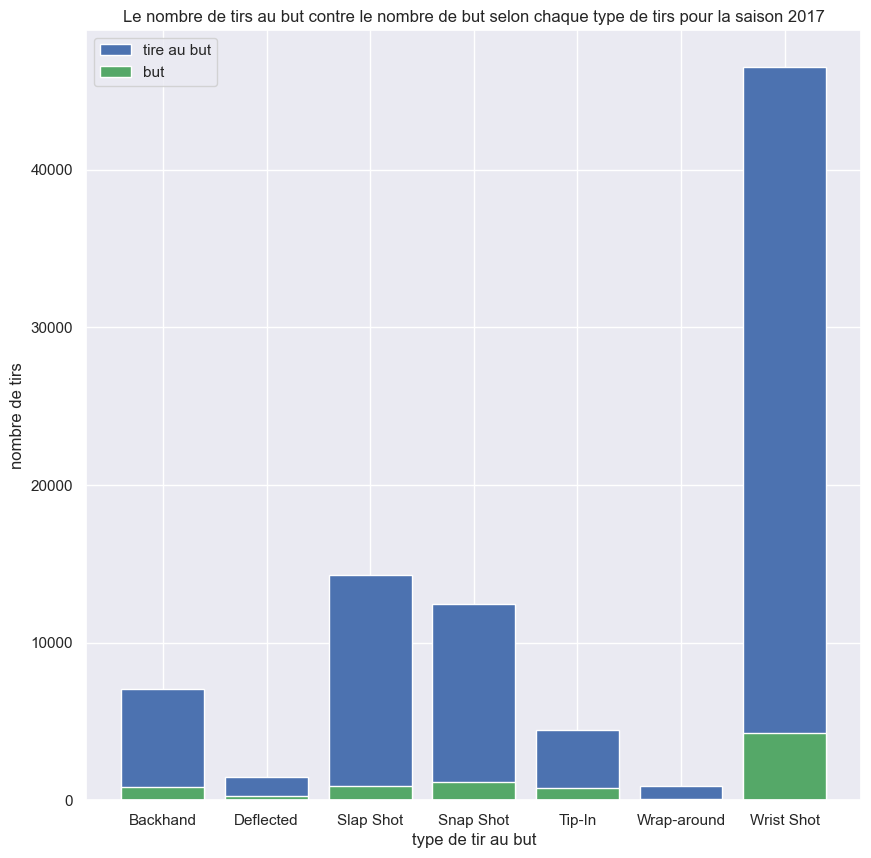

In [12]:
sns.set(rc={"figure.figsize":(10, 10)})
plt.bar(season_2017_df_shots['type_of_shot'], season_2017_df_shots['count'], label="tire au but", color='b')
plt.bar(season_2017_df_goals['type_of_shot'], season_2017_df_goals['count'], label="but", color='g')
plt.plot()

plt.xlabel("type de tir au but")
plt.ylabel("nombre de tirs")
plt.title("Le nombre de tirs au but contre le nombre de but selon chaque type de tirs pour la saison 2017")
plt.legend()
plt.show()

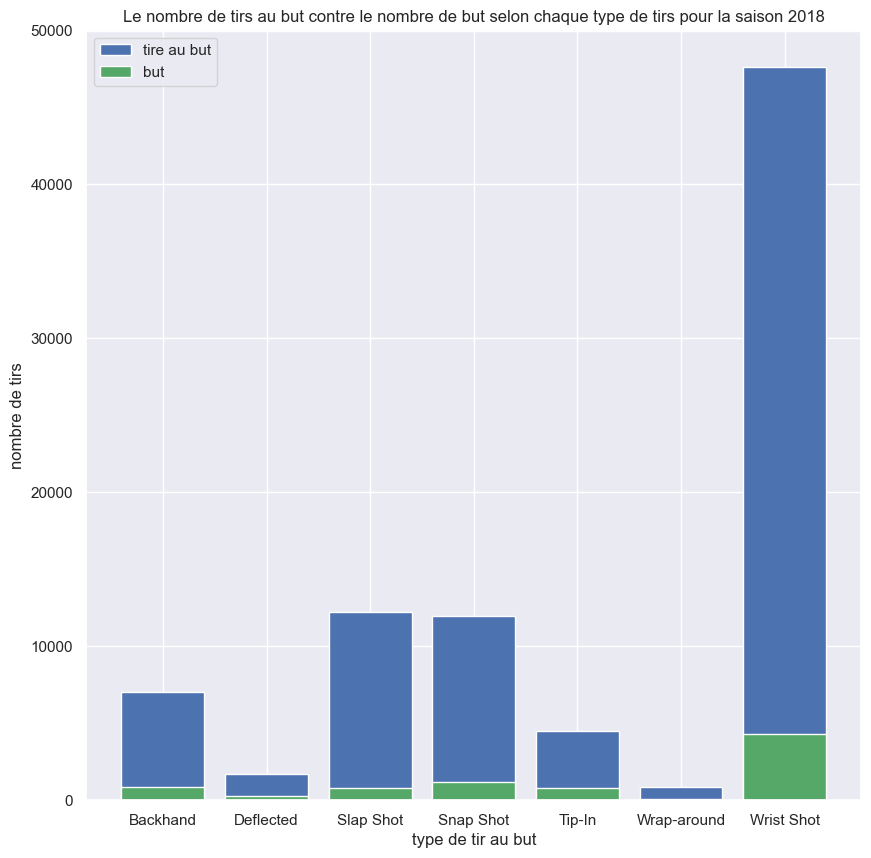

In [90]:
sns.set(rc={"figure.figsize":(10, 10)})
plt.bar(season_2018_df_shots['type_of_shot'], season_2018_df_shots['count'], label="tire au but", color='b')
plt.bar(season_2018_df_goals['type_of_shot'], season_2018_df_goals['count'], label="but", color='g')
plt.plot()

plt.xlabel("type de tir au but")
plt.ylabel("nombre de tirs")
plt.title("Le nombre de tirs au but contre le nombre de but selon chaque type de tirs pour la saison 2018")
plt.legend()
plt.show()

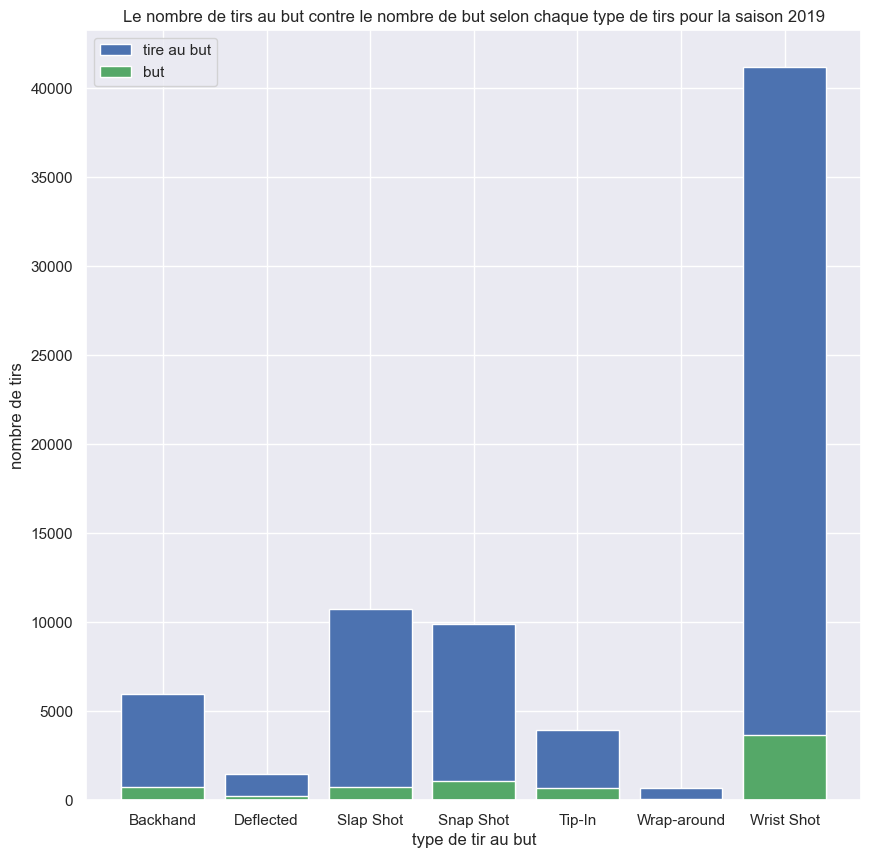

In [91]:
sns.set(rc={"figure.figsize":(10, 10)})
plt.bar(season_2019_df_shots['type_of_shot'], season_2019_df_shots['count'], label="tire au but", color='b')
plt.bar(season_2019_df_goals['type_of_shot'], season_2019_df_goals['count'], label="but", color='g')
plt.plot()

plt.xlabel("type de tir au but")
plt.ylabel("nombre de tirs")
plt.title("Le nombre de tirs au but contre le nombre de but selon chaque type de tirs pour la saison 2019")
plt.legend()
plt.show()

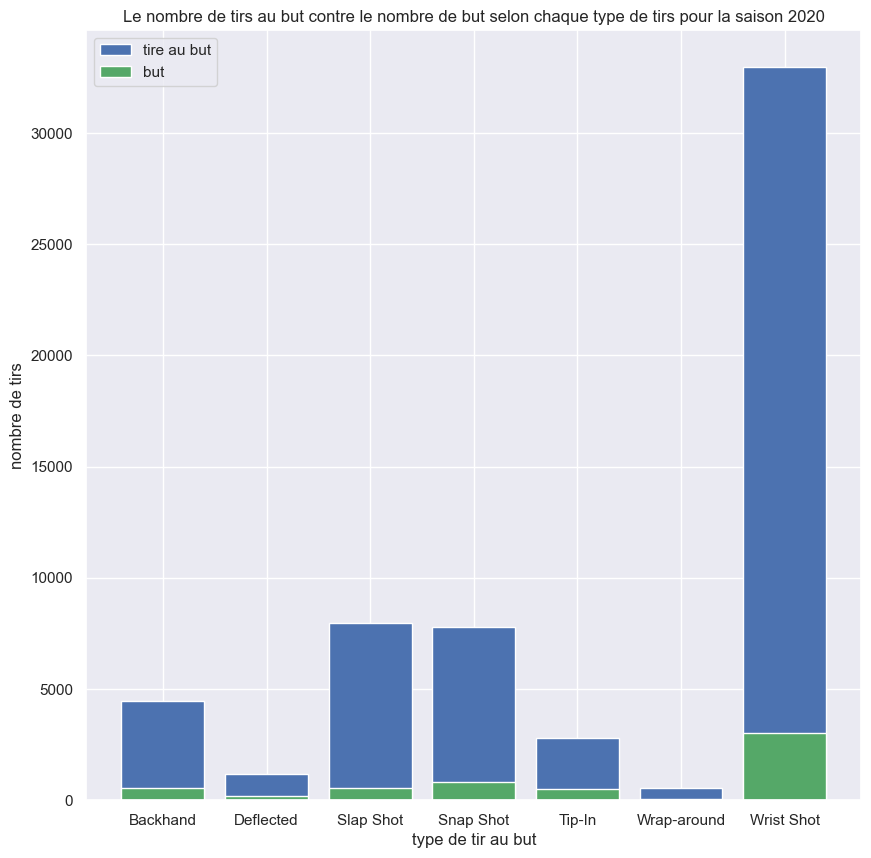

In [92]:
sns.set(rc={"figure.figsize":(10, 10)})
plt.bar(season_2020_df_shots['type_of_shot'], season_2020_df_shots['count'], label="tire au but", color='b')
plt.bar(season_2020_df_goals['type_of_shot'], season_2020_df_goals['count'], label="but", color='g')
plt.plot()

plt.xlabel("type de tir au but")
plt.ylabel("nombre de tirs")
plt.title("Le nombre de tirs au but contre le nombre de but selon chaque type de tirs pour la saison 2020")
plt.legend()
plt.show()

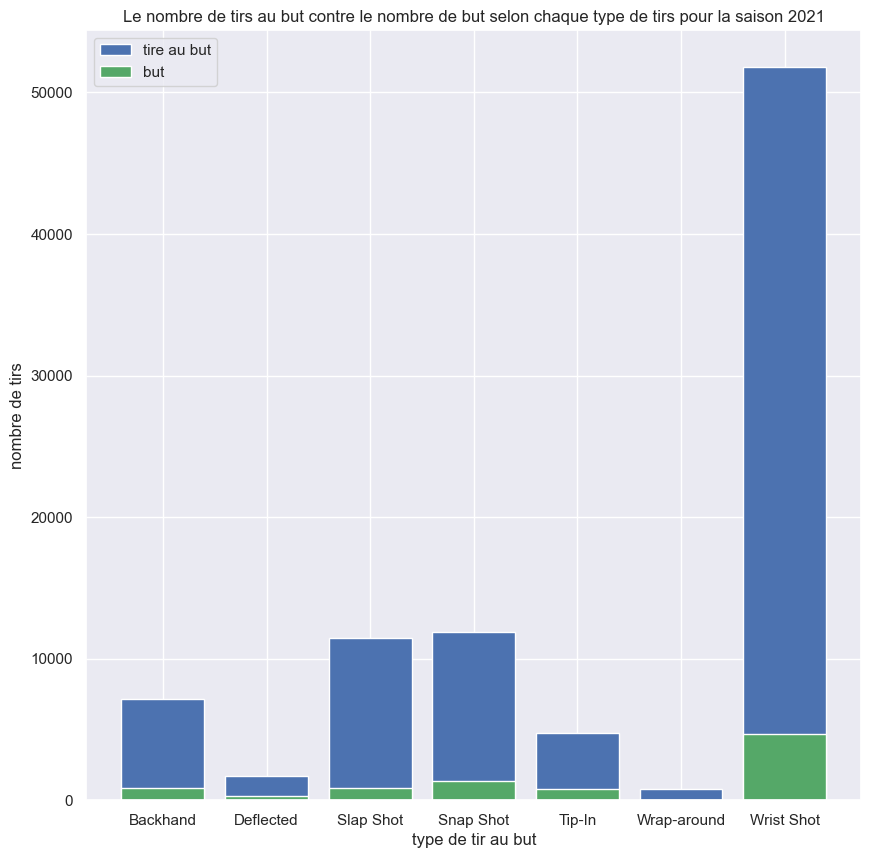

In [93]:
sns.set(rc={"figure.figsize":(10, 10)})
plt.bar(season_2021_df_shots['type_of_shot'], season_2021_df_shots['count'], label="tire au but", color='b')
plt.bar(season_2021_df_goals['type_of_shot'], season_2021_df_goals['count'], label="but", color='g')
plt.plot()

plt.xlabel("type de tir au but")
plt.ylabel("nombre de tirs")
plt.title("Le nombre de tirs au but contre le nombre de but selon chaque type de tirs pour la saison 2021")
plt.legend()
plt.show()

In [13]:
#Create a new dataframe for a new question from the original dataframe and drop columns we dont need
_season_2017_df = df_season_2017.copy()
_season_2017_df.drop(['about.periodTime','about.eventId','team.name','players.0.player.fullName','players.1.player.fullName','result.strength.code','result.emptyNet'], inplace=True, axis=1)
_season_2017_df.head()

,about.eventIdx,result.eventTypeId,coordinates.x,coordinates.y,result.secondaryType,gamePk
0,5,SHOT,-36.0,-28.0,Wrist Shot,2017020001
1,7,SHOT,-75.0,1.0,Wrist Shot,2017020001
2,11,SHOT,-73.0,10.0,Backhand,2017020001
3,16,SHOT,80.0,-3.0,Wrist Shot,2017020001
4,24,SHOT,-44.0,-21.0,Snap Shot,2017020001


In [14]:
#We clear out all the values that are null on both the x and y coordinate
list_distance = list()
mask = ~_season_2017_df['coordinates.x'].isna()
_season_2017_df['mask']=mask
_season_2017_df = _season_2017_df.query("mask == True")
_season_2017_df.reset_index(drop=True, inplace=True)
list_x = _season_2017_df['coordinates.x']


mask = ~_season_2017_df['coordinates.y'].isna()
_season_2017_df['mask']=mask
_season_2017_df = _season_2017_df.query("mask == True")
_season_2017_df.reset_index(drop=True, inplace=True)
list_y = _season_2017_df['coordinates.y']




In [15]:
#We assume the goal position to be around this coordinate
goal_position = [90, 0]

#We simply need the distance so we can make both x and y value positive and calculate from there
for i in range(len(list_x)):
    list_distance.append(np.sqrt(np.sum([np.square(np.abs(list_x[i])-goal_position[0]),np.square(np.abs(list_y[i])-goal_position[1])])))
_season_2017_df['distance_shot'] = list_distance
_season_2017_df.drop(['mask','coordinates.x','coordinates.y'], axis=1, inplace=True)

_season_2017_df['bins'] = pd.cut(_season_2017_df['distance_shot'],[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])
_season_2017_df.head()

#We define the middles of the bins as to not work with intervals
middle_of_bin = [2.5,7.5,12.5,17.5,22.5,27.5,32.5,37.5,42.5,47.5,52.5,57.5,62.5,67.5,72.5,77.5,82.5,87.5,92.5,97.5]

In [17]:
__season_2017_df = _season_2017_df.groupby(['bins','result.secondaryType','result.eventTypeId']).count().reset_index()
__season_2017_df.rename(columns={'result.secondaryType':'type_of_shot', 'result.eventTypeId':'type_of_shot_id'}, inplace=True) 

goal_2017 = __season_2017_df.query('type_of_shot_id == "GOAL"').reset_index(drop=True)
shot_2017 = __season_2017_df.query('type_of_shot_id == "SHOT"').reset_index(drop=True)
type_2017 = _season_2017_df.groupby(['result.secondaryType']).count().reset_index()

In [18]:
middle_of_bins = [2.5,2.5,2.5,2.5,2.5,2.5,2.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,12.5,12.5,12.5,12.5,12.5,12.5,12.5,17.5,17.5,17.5,17.5,17.5,17.5,17.5,22.5,22.5,22.5,22.5,22.5,22.5,22.5,27.5,27.5,27.5,27.5,27.5,27.5,27.5,32.5,32.5,32.5,32.5,32.5,32.5,32.5,37.5,37.5,37.5,37.5,37.5,37.5,37.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,47.5,47.5,47.5,47.5,47.5,47.5,47.5,52.5,52.5,52.5,52.5,52.5,52.5,52.5,57.5,57.5,57.5,57.5,57.5,57.5,57.5,62.5,62.5,62.5,62.5,62.5,62.5,62.5,67.5,67.5,67.5,67.5,67.5,67.5,67.5,72.5,72.5,72.5,72.5,72.5,72.5,72.5,77.5,77.5,77.5,77.5,77.5,77.5,77.5,82.5,82.5,82.5,82.5,82.5,82.5,82.5,87.5,87.5,87.5,87.5,87.5,87.5,87.5,92.5,92.5,92.5,92.5,92.5,92.5,92.5,97.5,97.5,97.5,97.5,97.5,97.5,97.5]
len(middle_of_bins)

140

In [19]:
list_test_1 = goal_2017['distance_shot']/(shot_2017['distance_shot']+goal_2017['distance_shot'])
shot_2017['probability_to_score'] = list_test_1
shot_2017['probability_to_score'].fillna(0, inplace=True)
shot_2017.head(10)

,bins,type_of_shot,type_of_shot_id,about.eventIdx,gamePk,distance_shot,probability_to_score
0,"(0, 5]",Backhand,SHOT,13,13,13,0.458333
1,"(0, 5]",Deflected,SHOT,4,4,4,0.428571
2,"(0, 5]",Slap Shot,SHOT,2,2,2,0.333333
3,"(0, 5]",Snap Shot,SHOT,5,5,5,0.500000
4,"(0, 5]",Tip-In,SHOT,9,9,9,0.550000
5,"(0, 5]",Wrap-around,SHOT,50,50,50,0.056604
6,"(0, 5]",Wrist Shot,SHOT,30,30,30,0.400000
7,"(5, 10]",Backhand,SHOT,1039,1039,1039,0.189548
8,"(5, 10]",Deflected,SHOT,199,199,199,0.234615
9,"(5, 10]",Slap Shot,SHOT,58,58,58,0.256410


In [20]:
shot_2017.head(10)

,bins,type_of_shot,type_of_shot_id,about.eventIdx,gamePk,distance_shot,probability_to_score
0,"(0, 5]",Backhand,SHOT,13,13,13,0.458333
1,"(0, 5]",Deflected,SHOT,4,4,4,0.428571
2,"(0, 5]",Slap Shot,SHOT,2,2,2,0.333333
3,"(0, 5]",Snap Shot,SHOT,5,5,5,0.500000
4,"(0, 5]",Tip-In,SHOT,9,9,9,0.550000
5,"(0, 5]",Wrap-around,SHOT,50,50,50,0.056604
6,"(0, 5]",Wrist Shot,SHOT,30,30,30,0.400000
7,"(5, 10]",Backhand,SHOT,1039,1039,1039,0.189548
8,"(5, 10]",Deflected,SHOT,199,199,199,0.234615
9,"(5, 10]",Slap Shot,SHOT,58,58,58,0.256410


In [21]:
type_1 = shot_2017.query('type_of_shot == "Backhand"').reset_index(drop=True)
type_1['bins'] = middle_of_bin

type_2 = shot_2017.query('type_of_shot == "Deflected"').reset_index(drop=True)
type_2['bins'] = middle_of_bin

type_3 = shot_2017.query('type_of_shot == "Slap Shot"').reset_index(drop=True)
type_3['bins'] = middle_of_bin

type_4 = shot_2017.query('type_of_shot == "Snap Shot"').reset_index(drop=True)
type_4['bins'] = middle_of_bin

type_5 = shot_2017.query('type_of_shot == "Tip-In"').reset_index(drop=True)
type_5['bins'] = middle_of_bin

type_6 = shot_2017.query('type_of_shot == "Wrap-around"').reset_index(drop=True)
type_6['bins'] = middle_of_bin

type_7 = shot_2017.query('type_of_shot == "Wrist Shot"').reset_index(drop=True)
type_7['bins'] = middle_of_bin

In [22]:
shot_2017['bins'] = middle_of_bins
shot_2017.drop(['distance_shot','type_of_shot_id'],axis=1, inplace=True)

In [23]:
some_df = shot_2017.pivot(index='bins', columns='type_of_shot', values='probability_to_score')
some_df.head()

type_of_shot,Backhand,Deflected,Slap Shot,Snap Shot,Tip-In,Wrap-around,Wrist Shot
bins,,,,,,,
2.5,0.458333,0.428571,0.333333,0.500000,0.550000,0.056604,0.400000
7.5,0.189548,0.234615,0.256410,0.197452,0.236257,0.066768,0.212121
12.5,0.150458,0.200811,0.181373,0.190818,0.173743,0.067114,0.182722
17.5,0.098347,0.190678,0.181287,0.175789,0.168512,0.117647,0.152429
22.5,0.059854,0.182540,0.130112,0.171216,0.127404,0.000000,0.132722


<AxesSubplot: title={'center': "Probabilité d'un but selon la distance pour chaque type de tir"}, xlabel="centre d'un interval de distance de 5 pieds", ylabel='Probabilité de faire un but'>

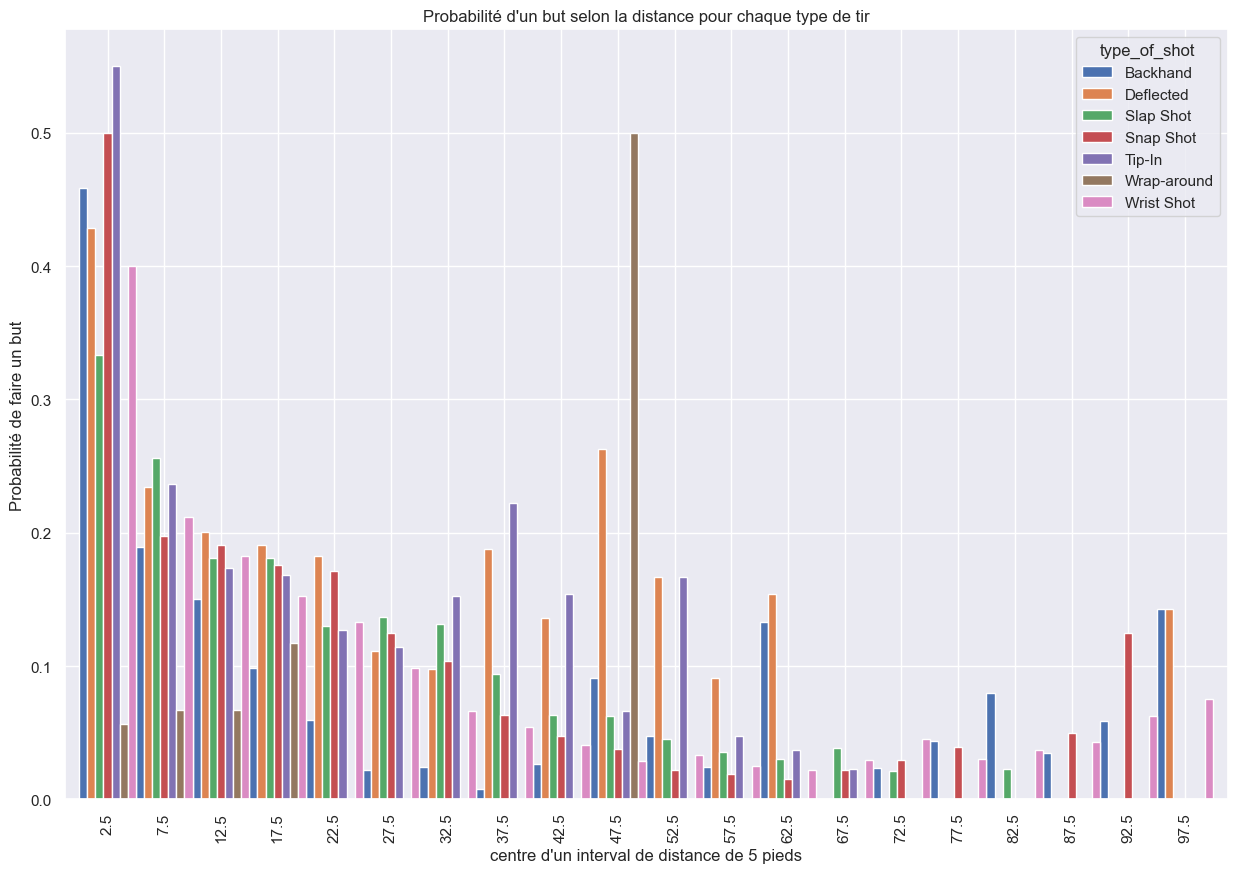

In [24]:
some_df.plot.bar(width=1, figsize= (15,10), title="Probabilité d'un but selon la distance pour chaque type de tir",
                xlabel="centre d'un interval de distance de 5 pieds", ylabel="Probabilité de faire un but")